In [2]:
import io
import requests

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-poster")

In [133]:
test_data_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1509583065&Signature=bPG%2B%2FrE8knG%2BZySTqFrOMMdZ4BZXLC%2BjIkqzsoZY1RU1YPidunVlHRo5cwtb6dHvrvXti1fAg9%2FgWlj7xbAgYDG8iQWZqCbnnJyeEueM4hBzM%2F0uUEE4YgH6gvD2IgGLBoBrS5AZVLa4PT1Cu%2BFp3e2NrEiAXVNP8uJbgTC0aFxjrdAeJSWuFoArjkj%2BvPYO5kxoGnqhnmTLKBeqPFIjwkkEaqCP6LzAcWj14KaDeoHaln88xbrEexSwuoX7JUNIMmnliuVhf%2Fico9AauJuWyAV9vO2fmIn402U1%2FtknBNInsLSc6Rh60ISglsd71A9jN8sy5aXHvRVys5JJn5Qj6w%3D%3D'

In [134]:
train_data_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1509583172&Signature=cE6ZeGArDhK9Hed%2FIaJO8kkc%2FpzUaDV8glZl6NgdYWDf93ser2cMqsWhztHFDGQD4vKcIg2RR4dBaKTYexwbnb3CpEjTxQS00fFkapxOC1jog6AGJg8hcCKg35i8ZdL%2BbVoekJ60J2ViL5WzEQMUtICZxluT%2BE2n9CYIdrXrOM2Ur97AlEV0aLOVYjllbO%2B0kV78kH%2F3Xl41Pmcwt1YpLhsNie0JdZI%2FY0v8KVBDe%2F5jEjP%2Fn%2F5TnWgewcN6QVUZXBV8PCaa9S2Z%2FIpEsFYNaXJlxQuoEk98chmk18suyC3hWsU0%2F3Ld9Ng%2B8VTcWQnomJIWCXK%2F4%2BuvLIjGdfK9nA%3D%3D'

In [135]:
train_content = requests.get(train_data_url).content
titanic = pd.read_csv(io.StringIO(train_content.decode('utf-8')))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


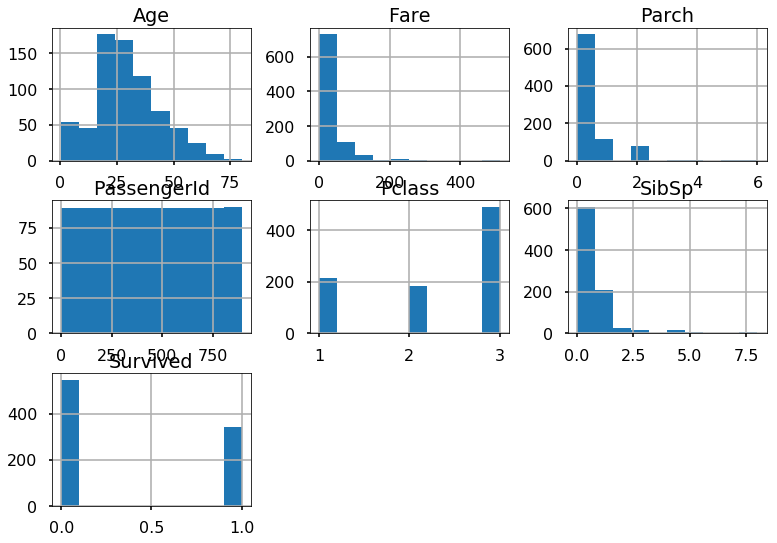

In [136]:
titanic.hist();

In [137]:
test_content = requests.get(test_data_url).content
titanic_test = pd.read_csv(io.StringIO(test_content.decode('utf-8')))
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


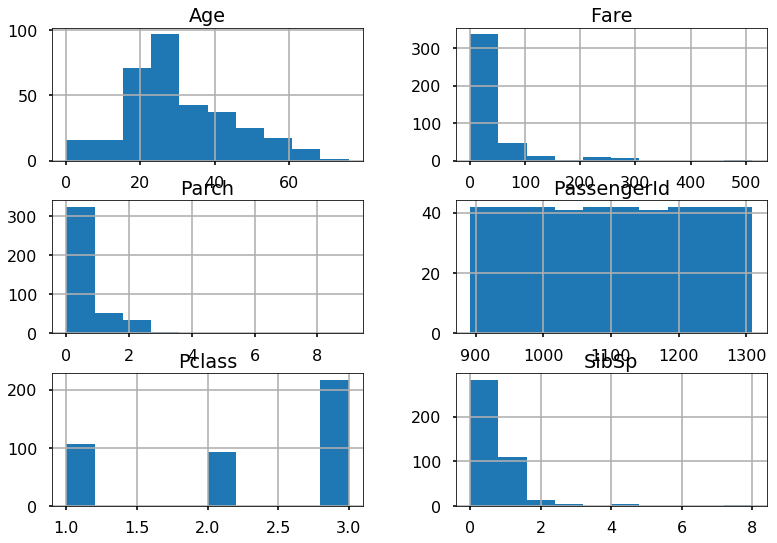

In [138]:
titanic_test.hist();

In [139]:
def project_features(frame):
    frame.Sex = frame.Sex.map({'male': 0, 'female': 1})
    frame.Fare = frame.Fare.fillna(frame.Fare.median())
    frame.Age = frame.Age.fillna(frame.Age.mean())
    return frame.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [140]:
training_data = project_features(titanic)
training_label = titanic['Survived']
training_data.drop('Survived', axis=1, inplace=True)

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=17)

In [143]:
clf_tree.fit(training_data, training_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn = clf_knn.fit(training_data, training_label)

In [146]:
testing_data = project_features(titanic_test)
testing_data.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare
413,3,0,30.27259,0,0,8.0500
414,1,1,39.00000,0,0,108.9000
415,3,0,38.50000,0,0,7.2500
416,3,0,30.27259,0,0,8.0500
417,3,0,30.27259,1,1,22.3583


In [147]:
predicted_tree = clf_tree.predict(testing_data)

In [148]:
titanic_test['Survived'] = predicted_tree
result_tree = titanic_test[['PassengerId', 'Survived']]
result_tree.to_csv('result_tree.csv', index=False)

In [149]:
predicted_knn = clf_knn.predict(testing_data)

In [150]:
titanic_test['Survived'] = predicted_knn
result_knn = titanic_test[['PassengerId', 'Survived']]
result_knn.to_csv('result_knn.csv', index=False)